In [ ]:
# Steps required
# Create a data pipeline that reads in image from file directory and is able to pass the image to model for training

# Design of U-Net backbone

# Design of CBAM attention model

# Design of U-Net integrated with CBAM and the skip connections

# Design of loss functions

# Design of visualisation to evaluate model
    # 1. Generate ground truth after a certain number of epochs
    # 2. Training curves
    # 3. Grad-CAM mask (mentioned in CBAM paper)

In [5]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [1]:
print(tf.version.VERSION)

2.15.0


# 0. Read in images and preprocess them
Source: https://www.tensorflow.org/tutorials/load_data/images

- Step 1: Specify batch size and image dimensions (Specifying the dimension results in Tensorflow cropping the image for you)
- Step 2: Split the dataset into train and validation split
- Step 3: Normalise the pixel values

In [2]:
# Step 1

batch_size = 8
img_height = 400
img_width = 400

In [37]:
# Step 2
# Use a seed of 1 to ensure reproducibility of results
# Use ImageDataGenerator instead

seed = 1
imgs_dir = os.path.join(os.path.dirname(os.getcwd()), 'datasets/train/image')
labels_dir = os.path.join(os.path.dirname(os.getcwd()), 'datasets/train/groundtruth')

# Equivalent to x_train
train_imgs_ds = tf.keras.utils.image_dataset_from_directory(
  imgs_dir,
  validation_split=0.1,
  subset="training",
  seed=seed,
  labels=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Equivalent to x_val
val_imgs_ds = tf.keras.utils.image_dataset_from_directory(
  imgs_dir,
  validation_split=0.1,
  subset="validation",
  seed=seed,
  labels=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Equivalent to y_train
train_gt_ds = tf.keras.utils.image_dataset_from_directory(
  labels_dir,
  color_mode="grayscale",
  validation_split=0.1,
  subset="training",
  labels=None,
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Equivalent to y_val
val_gt_ds = tf.keras.utils.image_dataset_from_directory(
  labels_dir,
  color_mode="grayscale",
  validation_split=0.1,
  subset="validation",
  seed=seed,
  labels=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 1 classes.
Using 90 files for training.
Found 100 files belonging to 1 classes.
Using 10 files for validation.
Found 100 files belonging to 1 classes.
Using 90 files for training.
Found 100 files belonging to 1 classes.
Using 10 files for validation.


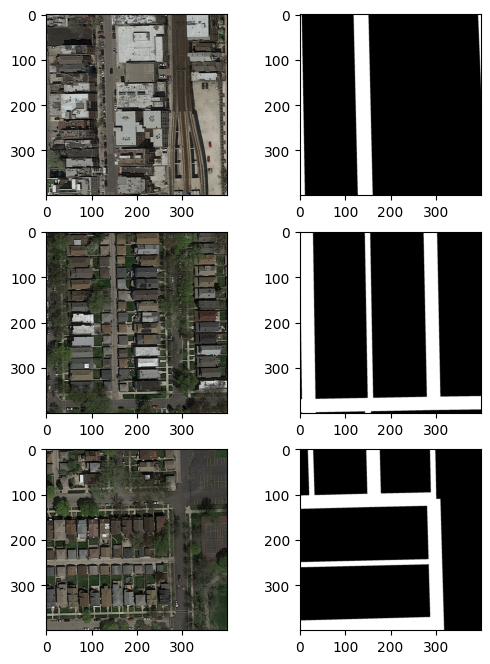

In [38]:
_imgs = []
_gts = []

for images in train_imgs_ds.take(1):
    for i in range(3):
        _imgs.append(images[i].numpy().astype("uint8"))

for gts in train_gt_ds.take(1):
    for i in range(3):
        _gts.append(gts[i].numpy().astype("uint8"))
                   
fig, axs = plt.subplots(3,2, figsize=(6, 8))
axs[0][0].imshow(_imgs[0])
axs[0][1].imshow(_gts[0], cmap="gray")
                   
axs[1][0].imshow(_imgs[1])
axs[1][1].imshow(_gts[1], cmap="gray")

axs[2][0].imshow(_imgs[2])
axs[2][1].imshow(_gts[2], cmap="gray")

In [39]:
# Step 3
# No need to normalise for groundtruths since they will only contain two possible pixel values, black or white
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_imgs_ds = train_imgs_ds.map(lambda x: (normalization_layer(x)))
train_gt_ds = train_gt_ds.map(lambda x: (normalization_layer(x)))

In [40]:
sample_img_batch = next(iter(train_imgs_ds))
sample_image = sample_img_batch[0]

print(f'Sample image, min. pixel value: {np.min(sample_image)}, max. pixel value: {np.max(sample_image)}')

Sample image, min. pixel value: 0.0, max. pixel value: 1.0
